# Digit Recognition Using MNIST - CNN

## Intro

Hello! 

Welcome to my first Neural Networks project. For this project I'll be attempting the famous MNIST handwriiten number classification problem. I'll use Convolutional Neural Networks (CNN) to correctly identify and classify the numbers.

## CNN

CNN is a specialized type of neural network designed for processing grid like data searches such as images. CNN is a great use-case for this project because it uses ***filters(kernels)*** to scan small parts of the image at a time, capturing special patterns like edges, textures, or shapes.


## Overview of MNIST

The **MNIST database** (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets.The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains **60,000** training images and **10,000** testing images.Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

## Import Libraries

In [1]:
#to suppress warnings:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #visualizations
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix #to evaluate accuracy of a classification

#from keras.utils.np_utils import to_categorical #for one hot encoding/ vecotrization of varibles
from keras.utils import to_categorical
from keras.models import Sequential #Sequential Model/API for our model

#Dense allows us to connect each neuron/output 
#Dropout layer randomly ses input units to zero, batchnorm - stabilizes the learning
#Conv2D a 2x2 Conv Kernel # Flatten - flattens the image, MaxPool2D takes the max when filtering
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

from keras.optimizers import Adam #for optimization
from tensorflow.keras.preprocessing.image import ImageDataGenerator #random data from our train set
from keras.callbacks import LearningRateScheduler # adjust LR each epoch

## Import Dataset

In [2]:
# Reading the folder architecture of Kaggle to get the dataset path.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Data Exploration

### Objective


The main objective of this analysis is to build an effective and accurate model for recognizing handwritten digits using the MNIST dataset. This analysis aims to explore the dataset comprehensively, understand the underlying patterns, and implement machine learning models for digit classification. The approach includes preprocessing the data, visualizing pixel intensity distributions, and testing various algorithms to identify the best-performing one. Potential challenges, such as variations in digit styles or overlapping pixel patterns, are anticipated and factored into the analysis to ensure robustness. By addressing these aspects, the project ensures a structured and insightful exploration of the MNIST data.

## Overview of Data

The MNIST (Modified National Institute of Standards and Technology) dataset consists of 70,000 handwritten digit images, specifically:

* 60,000 training images
* 10,000 test images

**Features:**

* Image size: 28x28 pixels (784 features)
* Grayscale values: 0-255 
* Labels: Digits 0-9 (10 classes)

**Data Characteristics:**

* Each pixel represents a feature
* Input shape: (n_samples, 784)
* Target: Single integer 0-9
* Balanced dataset with ~3,000+ examples per digit

**Data Processing:**

* Flattened 2D images to 1D arrays
* Normalized pixel values for consistent scaling
* One-hot encoded target labels for classification


For the purpose of analysis and understanding of our data we'll load them as CSV/ Dataframes. We'll perform various data cleaning and visualizations to get a good grasp of our data.

In [3]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
output_data = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [4]:
print(train_data.shape, test_data.shape)

(42000, 785) (28000, 784)


In [5]:
# Looking at a few rows from the data isn't a bad idea.
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
train_data.isna().sum().any()

False

In [8]:
test_data.isna().sum().any()

False

In [9]:
mnist_train_data = train_data.iloc[:, 1:]
mnist_train_label = train_data.loc[:, 'label']

mnist_train_data = mnist_train_data/255


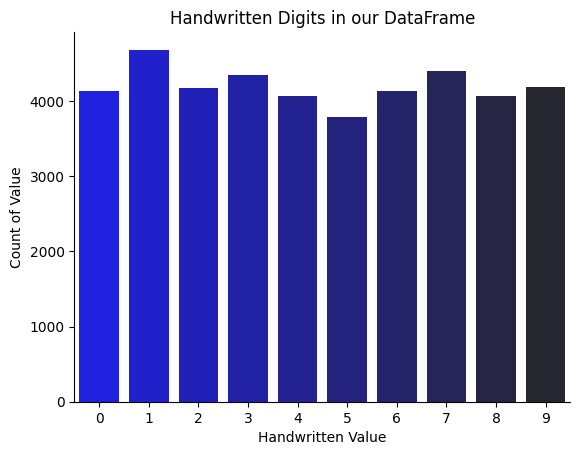

In [10]:
import seaborn as sns
plot_df = mnist_train_label.value_counts().to_frame(name='count')
plot_df.reset_index(inplace=True)
plot_df.rename(columns={'index': 'handwritten_no'},inplace=True)

sns.barplot(data=plot_df,x='label',y='count',palette='dark:b_r')
plt.xlabel("Handwritten Value")
plt.ylabel("Count of Value")
plt.title("Handwritten Digits in our DataFrame")
sns.despine()

> All values from 0 to 1 are in our dataframe so we can proceed.

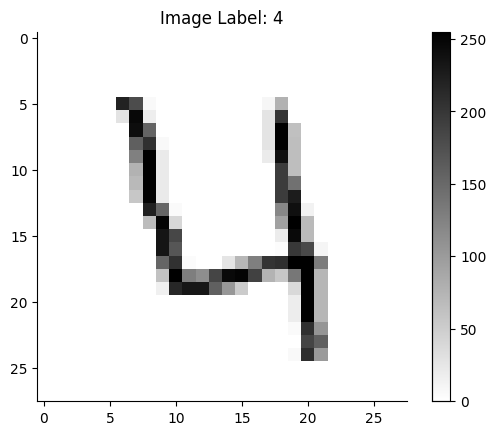

In [11]:
digit = train_data.loc[3, 'pixel0':]
arr = np.array(digit)

image_arr = np.reshape(arr, (28,28))
dig_img = plt.imshow(image_arr, cmap=plt.cm.binary)
plt.colorbar(dig_img)
plt.title("Image Label: {}".format(train_data.loc[3, 'label']))
sns.despine()

In [12]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


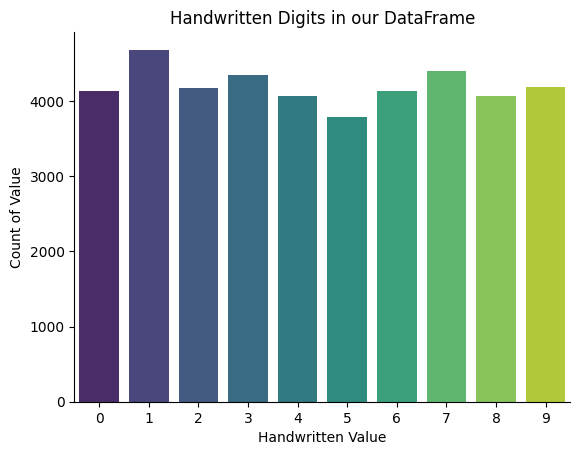

In [13]:
# Create a DataFrame for the labels
labels_df = pd.DataFrame(train_data, columns=['label'])

# Plot the distribution of digits
sns.countplot(data=labels_df, x='label', palette='viridis')
plt.xlabel("Handwritten Value")
plt.ylabel("Count of Value")
plt.title("Handwritten Digits in our DataFrame")
sns.despine()
plt.show()

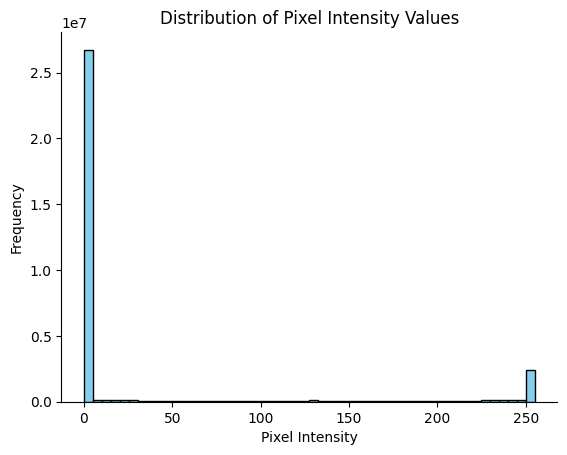

In [14]:
# Flatten the dataset to combine pixel values
pixel_values = train_data.drop(columns=['label']).to_numpy().flatten()
#pixel_values = train_data.flatten()

# Plot the histogram of pixel intensities
plt.hist(pixel_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Pixel Intensity Values")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
sns.despine()
plt.show()

## PCA

### Principle Component Analysis

PCA is a linear dimensionality reduction technique. PCA allows us to reduce the data in this case the images in to 2 or 3 dimensions.

This will allow us to see how differenct digit cases form a cluster. Also, we might be able to see classes overlap, digits that might have similar features such as ("3" or "8") will likely overlap.

PCA will also help us capture significant information about our data. It might also help us point out points that might be outliers meaning that they were poorly wriiten.

> All of these are assumptions that the PCA will help us distinguish and find answers to.

In [15]:
#Before feeding our data to PCA we'll have to standardize our data
# StandardScaler will convert our dataframe to a mean of 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standardized_df = standard_scaler.fit_transform(mnist_train_data)

from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(standardized_df)
pca_data.shape

(42000, 2)

In [16]:
standardized_df.shape

(42000, 784)

In [17]:
pd.DataFrame(pca_data)

,0,1
0,-5.140477,-5.226237
1,19.292429,6.033014
2,-7.644515,-1.705950
3,-0.474190,5.835815
4,26.559629,6.024913
...,...,...
41995,13.678860,-1.350890
41996,-8.869580,-1.187527
41997,0.495417,7.076536
41998,2.307203,-4.344900


In [18]:
standardized_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
pca_data = pd.DataFrame(data=pca_data,columns=['PC1', 'PC2'])
label = pd.DataFrame(mnist_train_label)
pca_data['label'] = mnist_train_label
pca_data

,PC1,PC2,label
0,-5.140477,-5.226237,1
1,19.292429,6.033014,0
2,-7.644515,-1.705950,1
3,-0.474190,5.835815,4
4,26.559629,6.024913,0
...,...,...,...
41995,13.678860,-1.350890,0
41996,-8.869580,-1.187527,1
41997,0.495417,7.076536,7
41998,2.307203,-4.344900,6


In [20]:

label = pd.DataFrame(mnist_train_label)
pca_data = pd.DataFrame(data=pca_data,columns=['PC1', 'PC2'])
pca_data['label'] = mnist_train_label

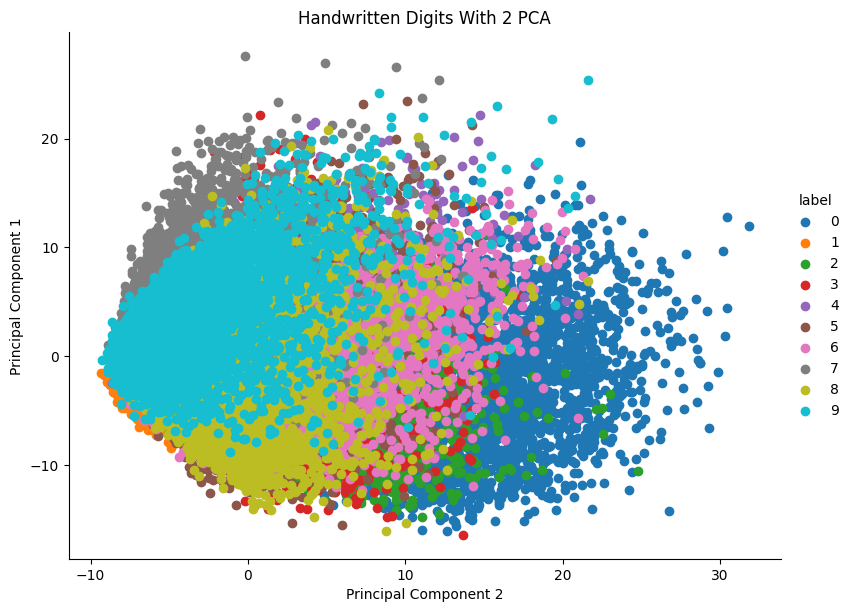

In [21]:

sns.FacetGrid(pca_data,hue='label',height=6, aspect=8/6).map(plt.scatter, 'PC1','PC2').add_legend()
sns.despine()
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 1")
plt.title("Handwritten Digits With 2 PCA")
plt.show()

> The graph clearly demonstrates that clusters that the numbers form interms of their similarity. Also, rememember our assumption that a few features in the digits the likes of 3 or 8 would have commonality so they would overlap. It's clear to see that they do.

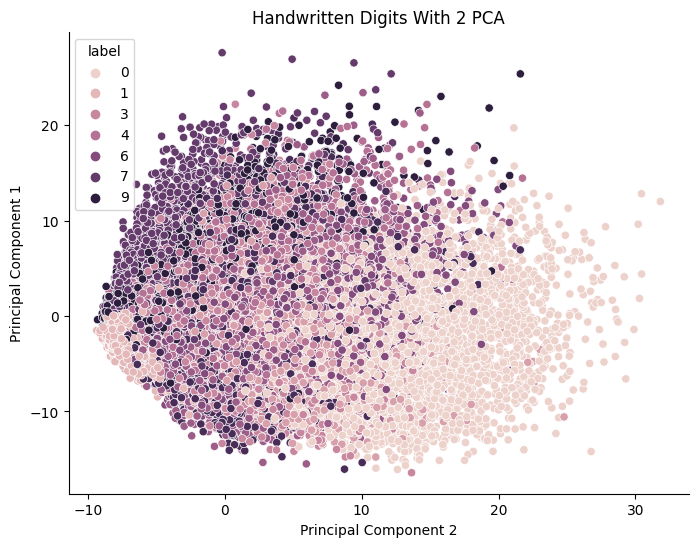

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='label')
sns.despine()
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 1")
plt.title("Handwritten Digits With 2 PCA")
plt.show()

## Create Model

In [23]:
train_ = '/kaggle/input/digit-recognizer/train.csv'
test_ = '/kaggle/input/digit-recognizer/test.csv'
output_ = '/kaggle/input/digit-recognizer/sample_submission.csv'

raw_data = np.loadtxt(train_, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:,1:], raw_data[:,0], test_size=0.1)

In [24]:
pd.DataFrame(raw_data).head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


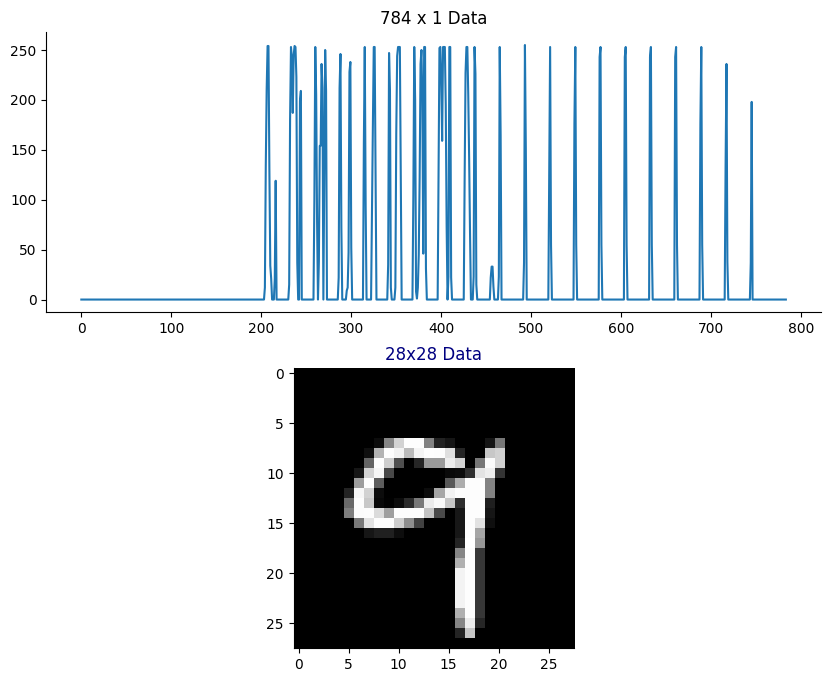

In [25]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
ax[0].plot(x_train[0])
ax[0].set_title('784 x 1 Data')
ax[1].imshow(x_train[0].reshape(28,28),cmap='gray')
ax[1].set_title('28x28 Data',color='navy')
sns.despine()

> **We now reshape all data this way. Keras wants an extra dimension in the end, for channels. If this had been RGB images, there would have been 3 channels, but as MNIST is gray scale it only uses one.**

### Reshape Data

We have to now store our data/ images in 1D arrays, will all the pixels lined up in a row.

In this case:

* 37800: Number of images.
* 28, 28: Height and width of each image.
* 1: Number of channels (grayscale).

In [26]:
print(x_train.shape)

(37800, 784)


In [27]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
x_train = x_train.reshape(-1,28,28,1)
x_val = x_val.reshape(-1,28,28,1)
print(x_train.shape)
print(x_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


### Standardize our Data

In [29]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255

### One Hot Encode

The labels were given as integers between 0 and 9. We need to convert these to one-hot encoding, i.e. a 10x1 array with one 1 and nine 0:s, with the position of the 1 showing us the value. See the example, with the position of the 1 showing the correct value for the digit in the graph above.

In [30]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
#example:
print(y_train[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Train Model

For this project we will be using the **Sequential API**, where we've to add on one layer at a time, starting from the input

The most important part are teh **Convolutional Layers (Conv2D)**. Here they have 16-32 filters that use nine weights each to transform a pixel to a weighted average of itself and its eight neighbors. As the same nine weights are used over the whole image, the net will pick up features that are useful everywhere. As it is only nine weights, we can stack many convolutional layers on top of each other without running out of memory/time.

In [31]:
model = Sequential()
input_shape = (28, 28, 1)

# Layer One
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

#Layers
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# Layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

# Layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# Utility Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,970 (3.11 MB)

 Trainable params: 814,778 (3.11 MB)

 Non-trainable params: 192 (768.00 B)

Important method to improve generalization is augmentation. Augmentaion means generating more training data by randomly perturbing the images. If done in the right way, it can force the net to only learn translation-invariant features. If you train this model over hundreds of epochs, augmentation will definitely improve your performance. Here in the Kernel, we will only look at each image 4-5 times, so the difference is smaller. We use a Keras function for augmentation.

In [33]:
# Data augmentaion class
# for our training, applies real time image augmentaion for the model to create variations in the data for maximum learning
datagen = ImageDataGenerator(zoom_range = 0.1,height_shift_range = 0.1,
                             width_shift_range = 0.1,rotation_range = 10)

In [34]:

model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=["accuracy"])

In [35]:
#learning rate adjusting object for our training
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [36]:
# create a history object storing the training progress, including the loss and accuracy
history = model.fit(datagen.flow(x_train, y_train, batch_size=10), #data augmentation
                             steps_per_epoch=500, #training samples per epoch 500 * 15 = 7500 training samples
                             epochs=40, #No of iterations of training
                             verbose=2, #output of the training
                             validation_data=(x_val,y_val), #model evaluation at each epoch
                             callbacks=[annealer]) #learning rate adjuster

Epoch 1/40
500/500 - 14s - 28ms/step - accuracy: 0.6642 - loss: 1.0714 - val_accuracy: 0.9448 - val_loss: 0.1806 - learning_rate: 0.0010
Epoch 2/40
500/500 - 10s - 20ms/step - accuracy: 0.8630 - loss: 0.4367 - val_accuracy: 0.9655 - val_loss: 0.1089 - learning_rate: 9.0000e-04
Epoch 3/40
500/500 - 9s - 19ms/step - accuracy: 0.9012 - loss: 0.3347 - val_accuracy: 0.9450 - val_loss: 0.1763 - learning_rate: 8.1000e-04
Epoch 4/40
500/500 - 9s - 19ms/step - accuracy: 0.9220 - loss: 0.2817 - val_accuracy: 0.9724 - val_loss: 0.0835 - learning_rate: 7.2900e-04
Epoch 5/40
500/500 - 9s - 19ms/step - accuracy: 0.9284 - loss: 0.2446 - val_accuracy: 0.9779 - val_loss: 0.0727 - learning_rate: 6.5610e-04
Epoch 6/40
500/500 - 11s - 23ms/step - accuracy: 0.9382 - loss: 0.1993 - val_accuracy: 0.9738 - val_loss: 0.0864 - learning_rate: 5.9049e-04
Epoch 7/40
500/500 - 9s - 19ms/step - accuracy: 0.9468 - loss: 0.1836 - val_accuracy: 0.9807 - val_loss: 0.0633 - learning_rate: 5.3144e-04
Epoch 8/40
500/500 - 

> A few parameters that could be tweaked (number of layers, number of filters, Dropout parameters, learning rate, augmentation settings). This is often done with trial and error, and there is no easy shortcut.

> Achieving convergence shouldn't be an issue unless you use an excessively large learning rate. However, it’s common to create a model that overfits, performing exceptionally well on the training set but poorly on the validation data. If you encounter this, consider increasing the Dropout parameters, enhancing data augmentation, or stopping training sooner. If your goal is to boost accuracy, you might want to add two additional layers or increase the number of filters.

### Model 2

In [37]:
model_2 = Sequential()
input_shape = (28, 28, 1)

# Layer One
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model_2.add(BatchNormalization())

#Layers
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(strides=(2,2)))
model_2.add(Dropout(0.25))

# Layers
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(BatchNormalization())

# Layers
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(strides=(2,2)))
model_2.add(Dropout(0.25))

# Utility Layer
model_2.add(Flatten())

# Dense Layer
model_2.add(Dense(512,activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

In [38]:
model_2.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics=["accuracy"])

In [39]:
# create a history object storing the training progress, including the loss and accuracy
history_2 = model_2.fit(datagen.flow(x_train, y_train, batch_size=10), #data augmentation
                             steps_per_epoch=500, #training samples per epoch 500 * 15 = 7500 training samples
                             epochs=40, #No iterations of training
                             verbose=2, #output of the training
                             validation_data=(x_val,y_val), #model evaluation at each epoch
                             callbacks=[annealer]) #learning rate adjuster

Epoch 1/40
500/500 - 18s - 36ms/step - accuracy: 0.6872 - loss: 1.0269 - val_accuracy: 0.8702 - val_loss: 0.5025 - learning_rate: 0.0010
Epoch 2/40
500/500 - 14s - 27ms/step - accuracy: 0.8914 - loss: 0.3846 - val_accuracy: 0.9571 - val_loss: 0.1419 - learning_rate: 9.0000e-04
Epoch 3/40
500/500 - 14s - 28ms/step - accuracy: 0.9122 - loss: 0.3028 - val_accuracy: 0.9629 - val_loss: 0.1218 - learning_rate: 8.1000e-04
Epoch 4/40
500/500 - 14s - 27ms/step - accuracy: 0.9220 - loss: 0.2843 - val_accuracy: 0.9657 - val_loss: 0.1238 - learning_rate: 7.2900e-04
Epoch 5/40
500/500 - 14s - 27ms/step - accuracy: 0.9384 - loss: 0.2218 - val_accuracy: 0.9819 - val_loss: 0.0612 - learning_rate: 6.5610e-04
Epoch 6/40
500/500 - 14s - 28ms/step - accuracy: 0.9512 - loss: 0.1738 - val_accuracy: 0.9802 - val_loss: 0.0683 - learning_rate: 5.9049e-04
Epoch 7/40
500/500 - 14s - 28ms/step - accuracy: 0.9506 - loss: 0.1808 - val_accuracy: 0.9819 - val_loss: 0.0606 - learning_rate: 5.3144e-04
Epoch 8/40
500/50

## Evaluate

In [40]:
# Model 1
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Model 1 - Final Loss: {}, and Final Accuracy: {}".format(final_loss, final_acc))

# Model 2
final_loss, final_acc = model_2.evaluate(x_val, y_val, verbose=0)
print("Model 2 - Final Loss: {}, and Final Accuracy: {}".format(final_loss, final_acc))

Model 1 - Final Loss: 0.022730952128767967, and Final Accuracy: 0.9933333396911621
Model 2 - Final Loss: 0.01999039389193058, and Final Accuracy: 0.9947618842124939


**Insights:**

> Model 2 outperformed Model 1, achieving 99.50% accuracy vs. 99.31% with a lower validation loss (0.0172 vs. 0.0215).
Data augmentation improved generalization, while learning rate annealing refined performance, stabilizing validation accuracy above 99.43%.
Performance gains were minimal after epoch 30, indicating early stopping could save resources.

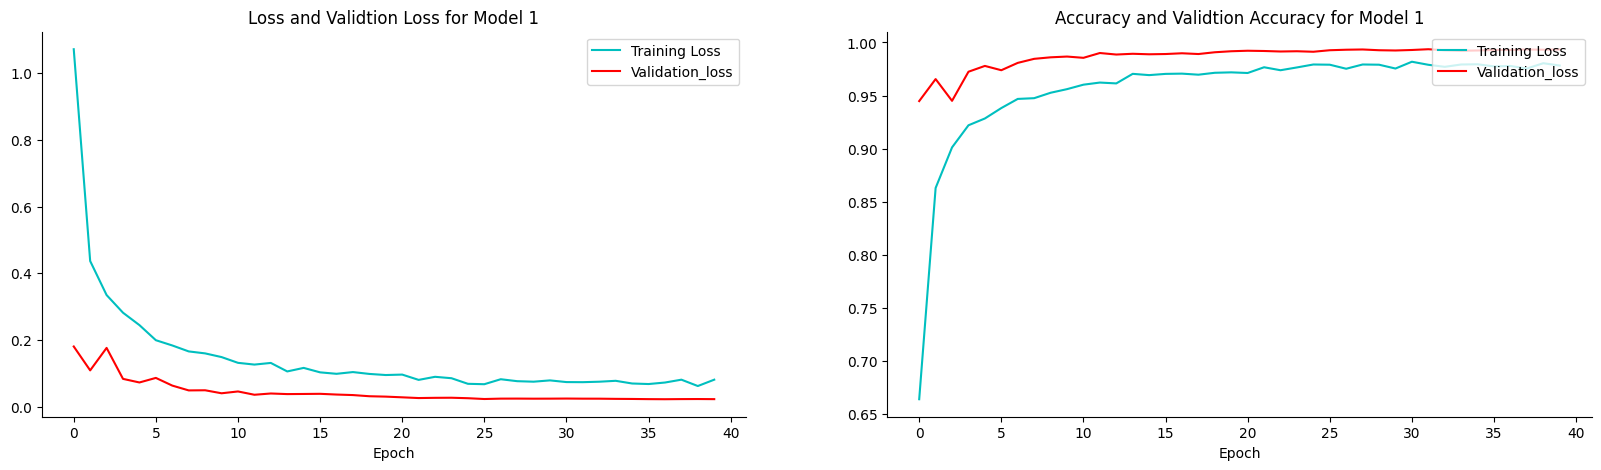

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='c',label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation_loss')
plt.xlabel("Epoch")
plt.ylabel("")
plt.title("Loss and Validtion Loss for Model 1")
plt.legend(loc='upper right')
sns.despine()


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='c',label='Training Loss')
plt.plot(history.history['val_accuracy'], color='r', label='Validation_loss')
plt.xlabel("Epoch")
plt.ylabel("")
plt.title("Accuracy and Validtion Accuracy for Model 1")
sns.despine()
plt.legend(loc='upper right')

plt.show()



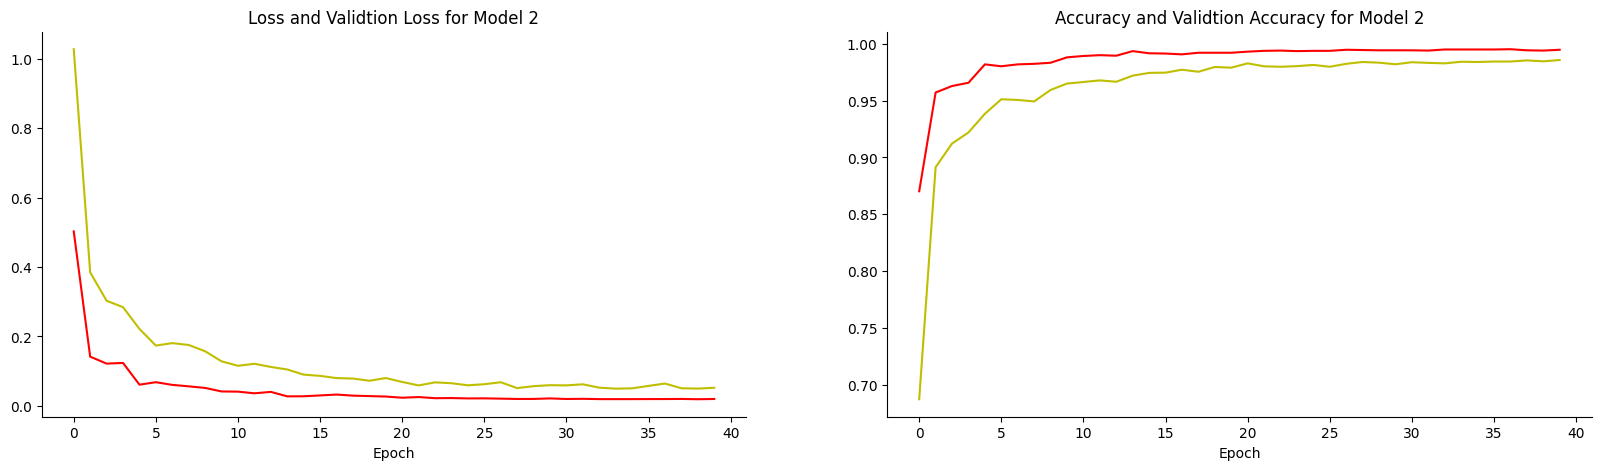

In [42]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_2.history['loss'], color='y',label='Training Loss')
plt.plot(history_2.history['val_loss'], color='r',label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("")
plt.title("Loss and Validtion Loss for Model 2")
sns.despine()


plt.subplot(1,2,2)
plt.plot(history_2.history['accuracy'], color='y',label='Training Loss')
plt.plot(history_2.history['val_accuracy'], color='r',label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("")
plt.title("Accuracy and Validtion Accuracy for Model 2")
sns.despine()

plt.show()



132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


<Figure size 2000x1000 with 0 Axes>

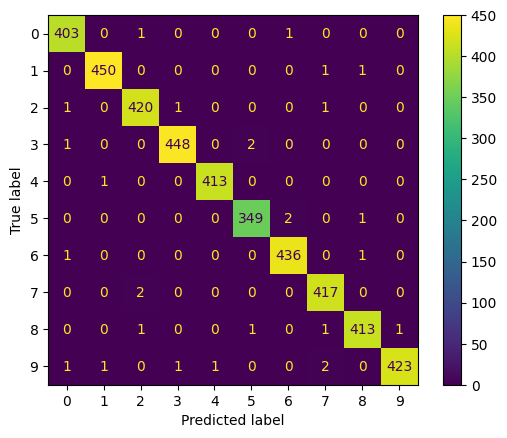

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(20,10))
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
# mask=np.triu(np.ones(cm.shape),k=1)
# np.fill_diagonal(cm,0)
# sns.heatmap(data=cm, annot=True, cmap='viridis',mask=mask)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Possible Flaws of Model

> The model relies heavily on data augmentation, which might not fully simulate real-world variations.
High accuracy may indicate potential overfitting, especially if training and validation data are not diverse enough.
Limited exploration of alternative architectures or regularization techniques like dropout.
